<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Results" data-toc-modified-id="Results-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Results</a></span><ul class="toc-item"><li><span><a href="#Audience-Counts-by-Type-and-Vertical" data-toc-modified-id="Audience-Counts-by-Type-and-Vertical-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Audience Counts by Type and Vertical</a></span></li><li><span><a href="#AK-analysis:-Emails" data-toc-modified-id="AK-analysis:-Emails-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>AK analysis: Emails</a></span></li><li><span><a href="#AK-analysis:-CIDs" data-toc-modified-id="AK-analysis:-CIDs-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>AK analysis: CIDs</a></span></li><li><span><a href="#AK-analysis:-Addresses" data-toc-modified-id="AK-analysis:-Addresses-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>AK analysis: Addresses</a></span></li><li><span><a href="#AK-analysis:-Data-Store,-other-AKs" data-toc-modified-id="AK-analysis:-Data-Store,-other-AKs-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>AK analysis: Data Store, other AKs</a></span></li><li><span><a href="#AK-analysis:-Pinless-Audiences" data-toc-modified-id="AK-analysis:-Pinless-Audiences-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>AK analysis: Pinless Audiences</a></span></li></ul></li><li><span><a href="#Load-Libraries,-Modules" data-toc-modified-id="Load-Libraries,-Modules-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load Libraries, Modules</a></span></li><li><span><a href="#Online-audiences-vs.-Offline-audiences" data-toc-modified-id="Online-audiences-vs.-Offline-audiences-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Online audiences vs. Offline audiences</a></span><ul class="toc-item"><li><span><a href="#data-wrangling" data-toc-modified-id="data-wrangling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>data wrangling</a></span></li></ul></li><li><span><a href="#Data-store-audiences-vs.-non-data-store-audiences" data-toc-modified-id="Data-store-audiences-vs.-non-data-store-audiences-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data store audiences vs. non-data store audiences</a></span><ul class="toc-item"><li><span><a href="#data-wrangling" data-toc-modified-id="data-wrangling-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>data wrangling</a></span></li></ul></li><li><span><a href="#Email-only-audiences" data-toc-modified-id="Email-only-audiences-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Email-only audiences</a></span><ul class="toc-item"><li><span><a href="#Data-wrangling" data-toc-modified-id="Data-wrangling-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Data wrangling</a></span></li></ul></li><li><span><a href="#CID-only-audiences" data-toc-modified-id="CID-only-audiences-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>CID-only audiences</a></span></li><li><span><a href="#Address-only-audiences" data-toc-modified-id="Address-only-audiences-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Address-only audiences</a></span><ul class="toc-item"><li><span><a href="#Results" data-toc-modified-id="Results-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Results</a></span><ul class="toc-item"><li><span><a href="#data-store" data-toc-modified-id="data-store-7.1.1"><span class="toc-item-num">7.1.1&nbsp;&nbsp;</span>data store</a></span></li></ul></li><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Data Wrangling</a></span></li></ul></li><li><span><a href="#PINless-imports-analysis" data-toc-modified-id="PINless-imports-analysis-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>PINless imports analysis</a></span><ul class="toc-item"><li><span><a href="#results" data-toc-modified-id="results-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>results</a></span></li></ul></li><li><span><a href="#appendix" data-toc-modified-id="appendix-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>appendix</a></span></li></ul></div>

# Results

## Audience Counts by Type and Vertical 
Active customers, enabled audiences, non-FBR audiences

In [178]:
import pandas as pd
audience_counts = {'Audience Type': ['Offline','Online', 'Total'], 'Data Store': [DMS_offline_audience_count, 
                                                                                  DMS_online_audience_count, 
                                                                                  DMS_offline_audience_count + DMS_online_audience_count],
        'All Audiences': [offline_audience_count,
                          online_audience_count, 
                          offline_audience_count + online_audience_count]
        }

aud_counts_table = pd.DataFrame(audience_counts, columns = ['Audience Type', 'Data Store', 'All Audiences'])
aud_counts_table

,Audience Type,Data Store,All Audiences
0,Offline,566,15307
1,Online,1082,5073
2,Total,1648,20380


## AK analysis: Emails

Active customers, enabled audiences, non-FBR audiences where AK = email. Validated audiences have one AK in SQL statement. 

Raw email definition: plaintext string e.g. anthonyschultz@gmail.com


In [183]:
email_aks = {'Vertical': ['non-Data Store', 'Data Store', 'Total'],
             'Raw': [raw_email_aud_counts - raw_email_DS_aud_counts, 
                     raw_email_DS_aud_counts, 
                     raw_email_aud_counts], 
             'SHA256': [SHA256_aud_counts - SHA256_DS_aud_counts, 
                        SHA256_DS_aud_counts, 
                        SHA256_aud_counts],
             'MD5': [MD5_aud_counts - MD5_DS_aud_counts, 
                     MD5_DS_aud_counts, 
                     MD5_aud_counts], 
             'SHA1':[SHA1_aud_counts - SHA1_DS_aud_counts, 
                     SHA1_DS_aud_counts, 
                     SHA1_aud_counts],
             'All Email Audiences':[((raw_email_aud_counts - raw_email_DS_aud_counts) + 
                                     (MD5_aud_counts - MD5_DS_aud_counts) +
                                    (SHA1_aud_counts - SHA1_DS_aud_counts) 
                                    ), (raw_email_DS_aud_counts + 
                                        SHA256_DS_aud_counts + 
                                        SHA1_DS_aud_counts +
                                       MD5_DS_aud_counts)
                                        , raw_email_aud_counts +
                                    SHA256_aud_counts +
                                    MD5_aud_counts +
                                    SHA1_aud_counts]}

email_aks_table = pd.DataFrame(email_aks, columns = ['Vertical','Raw', 'SHA256', 'MD5', 'SHA1', 'All Email Audiences'])
email_aks_table

,Vertical,Raw,SHA256,MD5,SHA1,All Email Audiences
0,non-Data Store,5173,45,94,24,5291
1,Data Store,82,6,15,8,111
2,Total,5255,51,109,32,5447


## AK analysis: CIDs

Active customers, enabled audiences, non-FBR audiences where AK = email. Validated audiences have one AK in SQL statement.

In [180]:
cid_aks = {'Vertical': ['non-Data Store', 'Data Store', 'Total'],
           'Offline': [CID_offline-CID_DS_offline, CID_DS_offline, CID_offline], 
           'Online': [CID_online-CID_DS_online, CID_DS_online, CID_online],
           'All CID Audiences': [(CID_offline-CID_DS_offline) + (CID_online-CID_DS_online), CID_DS_offline + CID_DS_online, CID_offline + CID_online]
          }
cid_aks_table = pd.DataFrame(cid_aks, columns = ['Vertical', 'Offline', 'Online', 'All CID Audiences'])
cid_aks_table

,Vertical,Offline,Online,All CID Audiences
0,non-Data Store,4106,1006,5112
1,Data Store,244,180,424
2,Total,4350,1186,5536


## AK analysis: Addresses

Active customers, enabled audiences, non-FBR audiences where AK = address fields and between 4-7 values.

In [181]:
address_aks = {'Vertical': ['non-Data Store', 'Data Store', 'Total'], 
               'Offline': [AK_address_auds_offline - address_aks_DS, 
                           address_aks_DS, 
                           AK_address_auds_offline],
               'Online': [AK_address_auds_online, 
                          0, 
                         AK_address_auds_online], 
               'All Address Audiences': [(AK_address_auds_offline - address_aks_DS), 
                                         address_aks_DS, 
                                         AK_address_auds_offline + AK_address_auds_online]
              }
address_aks_table = pd.DataFrame(address_aks, columns = ['Vertical', 'Offline', 'Online', 'All Address Audiences'])
address_aks_table


,Vertical,Offline,Online,All Address Audiences
0,non-Data Store,1063,3,1063
1,Data Store,90,0,90
2,Total,1153,3,1156


## AK analysis: Data Store, other AKs

In [340]:
ds_other_aks_table

,AK Type,Number of Audiences
0,pel,265
1,device_id,308
2,idl,101
3,clink,62
4,generic_id,73
5,first_name,57
6,agile_id,30
7,rnc_reg_id,24
8,last_name,16
9,fb_ext_id,16


## AK analysis: Pinless Audiences

Audiences with greater than 31 imports (50th percentile) and greater than 19% pinless imports (50th percentile). See section for methodology.

131 audiences fit this criteria

In [182]:
pinless_aks = {'Vertical': ['non-Data Store', 'Data Store', 'Total'], 
               'Email': [7, 0, 7], 
               'CID': [83, 36, 119], 
               'Address': [2, 0, 2]
                    }
pinless_aks_table = pd.DataFrame(pinless_aks, columns = ['Vertical', 'Email', 'CID', 'Address'])
pinless_aks_table

,Vertical,Email,CID,Address
0,non-Data Store,7,83,2
1,Data Store,0,36,0
2,Total,7,119,2


# Load Libraries, Modules

In [135]:
# import basics

from google.cloud import bigquery
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas_gbq
import tqdm
import datetime
pd.set_option('display.max_rows', 500)

# Online audiences vs. Offline audiences

In [136]:
## results

print("Total Enabled Audience:", offline_audience_count + online_audience_count)

# offline audiences: 15,707 
print("offline audience count:", offline_audience_count)

# online audiences: 5,117
print("online audience count:", online_audience_count)

Total Enabled Audience: 20375
offline audience count: 15307
online audience count: 5068


## data wrangling

query all audiences -> enabled, non-FBR

In [137]:
sql = """
SELECT *
FROM `corp-bi-us-prod.rldb.liveramp_customer_accounts` 
WHERE enabled = true AND customer_link_audience = false;
"""
x = datetime.datetime.now()
print("Last data pull:", x)
lcas = pandas_gbq.read_gbq(sql, project_id='liveramp-ts-bigquery')


Last data pull: 2020-07-08 14:47:32.712744


Downloading: 100%|██████████| 20978/20978 [00:04<00:00, 4405.25rows/s]


query audience type summary -> enabled, non-FBR

In [138]:
sql = """
SELECT type, count(type) AS type_count
FROM `corp-bi-us-prod.rldb.liveramp_customer_accounts` 
WHERE enabled = true AND customer_link_audience = false
GROUP BY type
ORDER BY type_count DESC
"""
x = datetime.datetime.now()
print("Last data pull:", x)
aud_sum = pandas_gbq.read_gbq(sql, project_id='liveramp-ts-bigquery')


Last data pull: 2020-07-08 14:47:39.214513


Downloading: 100%|██████████| 9/9 [00:00<00:00, 43.11rows/s]


In [139]:
# aud_sum = pd.read_csv('/Users/aschul/Documents/Documents - aschul1118mac/Code_Base/Investigations/20200417_AK_analysis/all_LCAs_summary.csv')
print(aud_sum.head(2))

offline_audience_count = aud_sum["type_count"][0]
online_audience_count = aud_sum["type_count"][1]
print(offline_audience_count)
print(online_audience_count)

                             type  type_count
0  OfflineLiverampCustomerAccount       15307
1   OnlineLiverampCustomerAccount        5073
15307
5073


# Data store audiences vs. non-data store audiences

In [140]:
## results
print("Data Provider customers:", dms_providers["customer_id"].count())

print("Offline DP audiences:", DMS_offline_audience_count)
print("Online DP audiences:", DMS_online_audience_count)
print("All DP audience:", DMS_offline_audience_count + DMS_online_audience_count)

Data Provider customers: 833
Offline DP audiences: 566
Online DP audiences: 1082
All DP audience: 1648


## data wrangling

query all data provider customers -> customer status = enabled

In [141]:
sql = """
SELECT dms_providers.customer_id
FROM `corp-bi-us-prod.rldb.dms_providers` AS dms_providers
  INNER JOIN `corp-bi-us-prod.rldb.customers` AS customers
    ON dms_providers.customer_id = customers.id
WHERE customers.status = 1
"""
x = datetime.datetime.now()
print("Last data pull:", x)
dms_providers = pandas_gbq.read_gbq(sql, project_id='liveramp-ts-bigquery')


Last data pull: 2020-07-08 14:47:40.961271


Downloading: 100%|██████████| 833/833 [00:00<00:00, 2903.56rows/s]


In [142]:
dms_providers["customer_id"].count()

833

query all data store audiences -> enabled, non-FBR audiences, customer status = enabled

In [143]:
sql = """
SELECT lr_customer_accounts.id AS audience_id, lr_customer_accounts.display_name AS audience_name, customers.name AS customer_name, customers.id AS customer_id, lr_customer_accounts.type
FROM `corp-bi-us-prod.rldb.dms_segments` AS dms_segments
INNER JOIN `corp-bi-us-prod.rldb.lrc_field_definitions` AS lrc_field_definitions
  ON dms_segments.lrc_field_definition_id = lrc_field_definitions.id
INNER JOIN `corp-bi-us-prod.rldb.liveramp_customer_accounts` AS lr_customer_accounts
  ON lrc_field_definitions.lr_customer_account_id = lr_customer_accounts.id
INNER JOIN `corp-bi-us-prod.rldb.customers` AS customers
  ON lr_customer_accounts.customer_id = customers.id
WHERE lr_customer_accounts.enabled = true AND lr_customer_accounts.customer_link_audience = false AND customers.status = 1
GROUP BY lr_customer_accounts.type, lr_customer_accounts.id, lr_customer_accounts.display_name, customers.name, customers.id
"""
x = datetime.datetime.now()
print("Last data pull:", x)

dms_audiences = pandas_gbq.read_gbq(sql, project_id='liveramp-ts-bigquery')
dms_audiences

Last data pull: 2020-07-08 14:47:42.354635


Downloading: 100%|██████████| 1648/1648 [00:00<00:00, 3540.09rows/s]


,audience_id,audience_name,customer_name,customer_id,type
0,88826,Ameribase Digital / Lighthouse List - Onboardi...,Lighthouse List - Ameribase Digital,521086,OfflineLiverampCustomerAccount
1,156416,Audience Cloud - Facebook Distros - Old (PUBIDs),Acxiom Internal,511196,OnlineLiverampCustomerAccount
2,329809,PeoplefindersDaaS - Custom Audiences,PeoplefindersDaaS,560186,OfflineLiverampCustomerAccount
3,156426,Audience Cloud - Twitter Distros,Acxiom Internal,511196,OnlineLiverampCustomerAccount
4,116619,Factual - Data [mobile],Factual,533129,OnlineLiverampCustomerAccount
...,...,...,...,...,...
1643,406951,NO - ShareThis,Fifty EU,597539,OnlineLiverampCustomerAccount
1644,318269,swoop-mid-full-size-sedan,Swoop,508536,OnlineLiverampCustomerAccount
1645,265819,Linkedin-HSBC - DataGuru-Segments,LinkedIn - HSBC,572859,OnlineLiverampCustomerAccount
1646,441371,Bombora - DDS - Dentsu - Intel - 59980 - Custo...,Bombora,514566,OnlineLiverampCustomerAccount


In [144]:
DMS_audience_count = dms_audiences.groupby(['type']).count()
DMS_offline_audience_count = DMS_audience_count["audience_id"][0]
DMS_online_audience_count = DMS_audience_count["audience_id"][1]
print("offline data store audience count:", DMS_offline_audience_count)
print("online data store audience count:", DMS_online_audience_count)

offline data store audience count: 566
online data store audience count: 1082


# Email-only audiences

In [145]:
print("All audiences, count w/email as AK")
print("Raw email:", raw_email_aud_counts)
print("Hashed email:", MD5_aud_counts + SHA256_aud_counts + SHA1_aud_counts)
print("Hashed email breakdown \n MD5 email:", MD5_aud_counts)
print("SHA256 email:", SHA256_aud_counts)
print("SHA1 email:", SHA1_aud_counts, "\n")

print("Non-DS audiences, count w/email as AK")
print("Raw email:", raw_email_aud_counts - raw_email_DS_aud_counts)
print("MD5 email:", MD5_aud_counts - MD5_DS_aud_counts)
print("SHA256:", SHA256_aud_counts - SHA256_DS_aud_counts)
print("SHA1:", SHA1_aud_counts - SHA1_DS_aud_counts, "\n")

print("DS Audience counts w/emails as AK")
print("raw email audiences:", raw_email_DS_aud_counts)
print("MD5 email:", MD5_DS_aud_counts)
print("SHA256:", SHA256_DS_aud_counts)
print("SHA1:", SHA1_DS_aud_counts)

All audiences, count w/email as AK
Raw email: 5255
Hashed email: 192
Hashed email breakdown 
 MD5 email: 109
SHA256 email: 51
SHA1 email: 32 

Non-DS audiences, count w/email as AK
Raw email: 5222
MD5 email: 90
SHA256: 45
SHA1: 26 

DS Audience counts w/emails as AK
raw email audiences: 33
MD5 email: 19
SHA256: 6
SHA1: 6


## Data wrangling

query all audiences with AK -> enabled, non-FBR audiences, enabled customers

In [146]:
sql = """
SELECT
  audience_key_labels.id AS ak_id,
  liveramp_customer_accounts.id,
  audience_key_labels.key_index,
  audience_key_labels.label,
  liveramp_customer_accounts.customer_id,
  liveramp_customer_accounts.display_name,
  COUNT(audience_key_labels.id) AS count_AKs
FROM
  `corp-bi-us-prod.rldb.audience_key_labels` AS audience_key_labels
INNER JOIN
  `corp-bi-us-prod.rldb.liveramp_customer_accounts` AS liveramp_customer_accounts
ON
  audience_key_labels.liveramp_customer_account_id = liveramp_customer_accounts.id
INNER JOIN
  `corp-bi-us-prod.rldb.customers` AS customers
ON
  liveramp_customer_accounts.customer_id = customers.id
WHERE
  customers.status = 1
  AND liveramp_customer_accounts.enabled = TRUE
  AND liveramp_customer_accounts.customer_link_audience = FALSE
  AND lower(audience_key_labels.label) LIKE '%email%'
  AND audience_key_labels.key_index = 0
GROUP BY
  liveramp_customer_accounts.id,
  liveramp_customer_accounts.display_name,
  liveramp_customer_accounts.customer_id,
  audience_key_labels.key_index,
  ak_id,
  audience_key_labels.label
HAVING count_AKs = 1
"""
x = datetime.datetime.now()
print("Last data pull:", x)

raw_emails_all_audiences = pandas_gbq.read_gbq(sql, project_id='liveramp-ts-bigquery')


Last data pull: 2020-07-08 14:47:45.449213


Downloading: 100%|██████████| 5579/5579 [00:00<00:00, 7340.48rows/s]


In [147]:
# normalize email columns (raw, MD5, SHA1, SHA256)
raw_emails_all_audiences["label"].replace({"Email":"email", 
                             "Email1":"email",
                             "Email Address":"email",
                             "EmailAddress":"email", 
                             "Emails":"email",
                             "EMAIL":"email",
                             "Email_1":"email",
                             "EmailAddress":"email",
                             "email_address":"email",
                             "EMAIL_ADDRESS":"email",
                             "Email 1":"email",
                             "Email(s)":"email",
                             "email1":"email",
                             "EMAIL_ID":"email",
                             "email1_MD5":"MD5",
                             "emailmd5":"MD5",
                             "profiles.email_address":"email",
                             "EMAIL_ADDR":"email",
                             "SHA256EMAIL1":"email",
                             "email_addr":"email",
                             "MD5EMAIL":"MD5",
                             "EmailAddress":"email",
                             "EMAIL1":"email",
                             "cust_email_addr":"email",
                             "Email_Address":"email",
                             "md5_email":"MD5",
                             "Email_ID":"email",
                             "EMAIL_ADDR_TXT":"email",
                             "emailAddress":"email",
                             "sha1_email":"SHA1",
                             "MD5Email":"MD5",
                             "email_1":"email",
                             "LRI_G_SHA1EMAIL1":"SHA1",
                             "LRI_G_SHA256EMAIL1":"SHA256",
                             "loweremailmd5":"MD5",
                             "email_sha256":"SHA256",
                             "SHA256_EMAIL":"SHA256",
                             "MD5_Email":"MD5",
                             "LRI_DER_SHA256EMAIL1":"SHA256",
                             "email_SHA-1":"SHA1",
                             "sha256email":"SHA256",
                             "email address":"email",
                             "purch_email_addr":"email",
                             "HashedEmail":"hashed_email",
                             "P_EMAIL_ADDRESS":"email",
                             "Member Email Address":"email",
                             "Email Addresses":"email",
                             "email_md5":"MD5",
                             "emails":"email",
                             "Email Hash":"hashed_email",
                             "customer_email":"email",
                             "EMAIL_ADDRESS_":"email",
                             "SHA 256 Email":"SHA256",
                             "EMAILADDRESS":"email",
                             "LRI_DER_SHA1EMAIL1":"SHA1",
                             "email_hash":"hashed_email",
                             "LRI_G_MD5EMAIL1":"MD5",
                             "EMAIL_SHA256":"SHA256",
                             "PII_EMAIL_ADDRESS":"email",
                             "EMail":"email",
                             "Email address":"email",
                             "SHA1_Email":"SHA1",
                             "LRI_DER_MD5EMAIL1":"MD5",
                             "EMAIL_1":"email",
                             "sha256_email":"SHA256",
                             "SHA256EMAIL":"SHA256",
                             "SHA256Email":"email",
                             "emailaddress":"email",
                             "email_id":"email",
                             "SHA1EMAIL":"SHA1",
                             "hashed email":"hashed_email",
                             "SHA256HASHEDEMAIL":"SHA256",
                             "email2":"email",
                             "EMAIL_ADDRESS_1":"email",
                             "md5email":"MD5",
                             "hashedemail":"hashed_email",
                             "EMAIL_HASHED":"hashed_email",
                             "Broker Email":"email",
                             "HASH_MD5_LOWER_EMAIL":"MD5",
                             "profileEmail":"email",
                             "email_Address":"email",
                             "Hashed_Email":"hashed_email",
                             "PER_EMAIL":"email",
                             "Hashed_Email_Address":"email",
                             "Peloton Order Order Email":"email",
                             "EMAIL,FN,LN,,ZIP,CT,PHONE,":"email",
                             "Hashed_Email_ID_Hex":"hashed_email",
                             "#email_lc_md5":"MD5",
                             "MD5_EMAIL":"MD5",
                             "\EMAIL\"":"email",
                             "Customer Email":"email",
                             "CUSTOMERS_SalesOrder_BILLTOLookup::Email":"email",
                             "profile.email":"email",
                             "HASHED_EMAIL":"hashed_email",
                             "sha256email1":"SHA256",
                             "Hashed Email":"hashed_email",
                             "CUST_EMAIL":"email",
                             "SHA256 Email":"SHA256",
                             "email,fn,ln,st,zip,ct,phone,":"email",
                             "best_email":"email",
                             "LRI_G_EMAIL1":"email",
                             "SHA2_EMAIL":"SHA2",
                             "Md5 Email":"MD5",
                             "md5(email1)":"MD5",
                             "master_email":"email",
                             "HASHED_CUST_EMAIL":"hashed_email",
                             "REAL_EMAIL":"email",
                             "email_sha1":"SHA1",
                             "MD5 EMAIL":"MD5",
                             "Email/Email":"email",
                             "hash_email":"hashed_email",
                             "email md5":"MD5",
                             "Email_address":"email",
                             "Email1_SHA-1":"SHA1",
                             "MD5 Hashed Email":"MD5",
                             "EE_EMAIL_ADDRESS":"email",
                             "Email1 Address":"email",
                             "DMD_EMAIL":"email",
                             "QBOVRT_master_email":"email",
                             "lower(b.email_addr_hash_txt)":"hashed_email",
                             "Email1_SHA256":"SHA256",
                             "HashedEmail1":"hashed_email",
                             "CONTACT_EMAIL_ADDR":"email",
                             "Email ":"email",
                             "EmailAddressmd5":"MD5",
                             "CONTACT EMAIL":"email",
                             "MD5EMAIL1":"MD5",
                             "MD5email":"MD5",
                             "sha256email\",470121,624331,470121,UPHE - Onboarding - Salesforce Data\"":"SHA256",
                             "sha256email\",287259,579949,28236,Swirl McGarryBowen - Onboarding\"":"SHA256",
                             "AX_CUREMAIL_10":"email",
                             "Email ":"email",
                             "SHA256_email":"SHA256",
                             "USA_EMAIL":"email",
                             "Right_email":"email",
                             "MDG EMAIL":"MD5",
                             "email3":"email",
                             "sha256email\",287259,579949,28236,Swirl McGarryBowen - Onboarding\"":"SHA256",
                             "sha256email\",470121,624331,470121,UPHE - Onboarding - Salesforce Data\"":"SHA256",
                             "email_SHA_256":"SHA256",
                             "hashed_emailId":"hashed_email",
                             "EMAIL_ADDRESS1":"email",
                             "email_adr1":"email",
                             "EmailAddressHash_MD5":"MD5",
                             "LRI_G_email_address":"email",
                             "DANDRVINSON@EMAIL.COM":"email",
                             "user_email":"email",
                             "Email_hashed":"hashed_email",
                             "P_EMAIL":"email",
                             "Hashed email":"hashed_email",
                             "SHA250Email":"SHA256",
                             "sha256email\",287259,579949,28236,Swirl McGarryBowen - Onboarding\"":"SHA256",
                             "sha256email\",470121,624331,470121,UPHE - Onboarding - Salesforce Data\"":"SHA256",
                             "Email5":"email",
                             "Orders Customer Email":"email",
                             "Encrypted Email address":"hashed_email",
                             "eMail":"email",
                             "patron_email_addr":"email",
                             "Client_Email":"email",
                             "email_01":"email",
                             "emailhash_md5":"MD5",
                             "Person Account: Email":"email",
                             "Email_Appended":"email",
                             "Email_address_hash":"hashed_email",
                             "sha256email\",470121,624331,470121,UPHE - Onboarding - Salesforce Data\"":"SHA256",
                             "EMAIL_HASH":"hashed_email",
                             "Email ID":"email",
                             "email_billing":"email",
                             "PRIMARY_EMAIL_ADDRESS":"email",
                             "Opportunity Email":"email",
                             "CnPh_1_01_Email":"email",
                             "MD5_email":"MD5",
                             "email_address_256hash":"SHA256",
                             "EMAIL ADDR":"email",
                             "sha256email\",154996,542386,15314,StubHub - Salesforce Onboarding\"":"SHA256",
                             "Hash Email":"hashed_email",
                             "prmry_email_addr":"email",
                             "sha256email\",248499,508256,24412,Caesars - Salesforce RFP\"":"SHA256",
                             "MEMBER_EMAIL":"email",
                             "Sha1_Email":"SHA1",
                             "HASH EMAIL ADDR":"hashed_email",
                             "Sha1_Email":"SHA1",
                             "HASH EMAIL ADDR":"hashed_email",
                             "CUS_EMAIL_ADDRESS":"email",
                             "channels.email.address":"email",
                             "\Email1\"\"":"email",
                             "primaryEmail":"email",
                             "sha256email\",313789,533849,313789,Audi - Salesforce Imports\"":"SHA256",
                             "HASEHD_EMAIL":"hashed_email",
                             "\Email1\"\"":"email",
                             "hash email":"hashed_email",
                             "REGI_EMAIL_ADDR":"email",
                             "Customers Email":"email",
                             "email_addres":"email",
                             "sha256email\",116909,533639,11536,Weight Watchers - Onboarding\"":"SHA256",
                             "EMAIL-sha1":"SHA1",
                             "Email Address 1":"email",
                             "Contact Business Email":"email",
                             "\Email1\"\"":"email",
                             "Personal_email":"email",
                             "sha256email\",154996,542386,15314,StubHub - Salesforce Onboarding\"":"SHA256",
                             "EMAIL_MATCH_ID_1":"email",
                             "MD5 Email":"MD5",
                             "associatedemailaddress":"email",
                             "Email_Hash":"hashed_email",
                             "Email_Hash ":"hashed_email",
                             "EMAIL ADDRESS	":"email",
                             "EMAILADDR":"email",
                             "EMAILADDR ":"email",
                             "Contact: Primary Email":"email",
                             "Email Address - Prospects":"email",
                             "sha_email	":"hashed_email",
                             "sha_email":"hashed_email",
                             "primary_contact_primary_email":"email",
                             "EMAIL_ADDR_1":"email",
                             "Primary_Email_Address":"email",
                             "CUST_EMAIL_ADDR":"email",
                             "AlternateEmail":"email"
                            }, inplace = True)                       

In [148]:
raw_email_values = pd.DataFrame(raw_emails_all_audiences["label"].value_counts())
raw_email_values.head()
raw_email_aud_counts = raw_email_values["label"][0]
MD5_aud_counts = raw_email_values["label"][1]
SHA256_aud_counts = raw_email_values["label"][3]
SHA1_aud_counts = raw_email_values["label"][4]

query all audiences with AK like '%email%' -> enabled, non-FBR audiences, enabled customers, data store

In [149]:
sql = """
SELECT
  audience_key_labels.id AS ak_id,
  liveramp_customer_accounts.id,
  audience_key_labels.key_index,
  audience_key_labels.label,
  liveramp_customer_accounts.customer_id,
  customers.name,
  liveramp_customer_accounts.display_name,
  COUNT(audience_key_labels.id) AS count_AKs
FROM
  `corp-bi-us-prod.rldb.audience_key_labels` AS audience_key_labels
INNER JOIN
  `corp-bi-us-prod.rldb.liveramp_customer_accounts` AS liveramp_customer_accounts
ON
  audience_key_labels.liveramp_customer_account_id = liveramp_customer_accounts.id
INNER JOIN
  `corp-bi-us-prod.rldb.customers` AS customers
ON
  liveramp_customer_accounts.customer_id = customers.id
WHERE
  liveramp_customer_accounts.id IN (
              SELECT
                lr_customer_accounts.id
              FROM
                `corp-bi-us-prod.rldb.dms_segments` AS dms_segments
              INNER JOIN
                `corp-bi-us-prod.rldb.lrc_field_definitions` AS lrc_field_definitions
              ON
                dms_segments.lrc_field_definition_id = lrc_field_definitions.id
              INNER JOIN
                `corp-bi-us-prod.rldb.liveramp_customer_accounts` AS lr_customer_accounts
              ON
                lrc_field_definitions.lr_customer_account_id = lr_customer_accounts.id
              INNER JOIN
                `corp-bi-us-prod.rldb.customers` AS customers
              ON
                lr_customer_accounts.customer_id = customers.id
              WHERE
                lr_customer_accounts.enabled = TRUE
                AND lr_customer_accounts.customer_link_audience = FALSE
                AND customers.status = 1
              GROUP BY
                lr_customer_accounts.id)
  AND customers.status = 1
  AND liveramp_customer_accounts.enabled = TRUE
  AND liveramp_customer_accounts.customer_link_audience = FALSE
  AND LOWER(audience_key_labels.label) LIKE '%email%'
  AND audience_key_labels.key_index = 0
GROUP BY
  liveramp_customer_accounts.id,
  liveramp_customer_accounts.display_name,
  liveramp_customer_accounts.customer_id,
  customers.name,
  audience_key_labels.key_index,
  ak_id,
  audience_key_labels.label
HAVING
  count_AKs = 1
"""
x = datetime.datetime.now()
print("Last data pull:", x)

raw_emails_DS = pandas_gbq.read_gbq(sql, project_id='liveramp-ts-bigquery')

Last data pull: 2020-07-08 14:47:47.944443


Downloading: 100%|██████████| 112/112 [00:00<00:00, 471.75rows/s]


In [150]:
# normalize email columns (raw, MD5, SHA1, SHA256)
raw_emails_DS["label"].replace({"Email":"email", 
                             "Email1":"email",
                             "Email Address":"email",
                             "EmailAddress":"email", 
                             "Emails":"email",
                             "EMAIL":"email",
                             "Email_1":"email",
                             "EmailAddress":"email",
                             "email_address":"email",
                             "EMAIL_ADDRESS":"email",
                             "Email 1":"email",
                             "Email(s)":"email",
                             "email1":"email",
                             "EMAIL_ID":"email",
                             "email1_MD5":"MD5",
                             "emailmd5":"MD5",
                             "profiles.email_address":"email",
                             "EMAIL_ADDR":"email",
                             "SHA256EMAIL1":"email",
                             "email_addr":"email",
                             "MD5EMAIL":"MD5",
                             "EmailAddress":"email",
                             "EMAIL1":"email",
                             "cust_email_addr":"email",
                             "Email_Address":"email",
                             "md5_email":"MD5",
                             "Email_ID":"email",
                             "EMAIL_ADDR_TXT":"email",
                             "emailAddress":"email",
                             "sha1_email":"SHA1",
                             "MD5Email":"MD5",
                             "email_1":"email",
                             "LRI_G_SHA1EMAIL1":"SHA1",
                             "LRI_G_SHA256EMAIL1":"SHA256",
                             "loweremailmd5":"MD5",
                             "email_sha256":"SHA256",
                             "SHA256_EMAIL":"SHA256",
                             "MD5_Email":"MD5",
                             "LRI_DER_SHA256EMAIL1":"SHA256",
                             "email_SHA-1":"SHA1",
                             "sha256email":"SHA256",
                             "email address":"email",
                             "purch_email_addr":"email",
                             "HashedEmail":"hashed_email",
                             "P_EMAIL_ADDRESS":"email",
                             "Member Email Address":"email",
                             "Email Addresses":"email",
                             "email_md5":"MD5",
                             "emails":"email",
                             "Email Hash":"hashed_email",
                             "customer_email":"email",
                             "EMAIL_ADDRESS_":"email",
                             "SHA 256 Email":"SHA256",
                             "EMAILADDRESS":"email",
                             "LRI_DER_SHA1EMAIL1":"SHA1",
                             "email_hash":"hashed_email",
                             "LRI_G_MD5EMAIL1":"MD5",
                             "EMAIL_SHA256":"SHA256",
                             "PII_EMAIL_ADDRESS":"email",
                             "EMail":"email",
                             "Email address":"email",
                             "SHA1_Email":"SHA1",
                             "LRI_DER_MD5EMAIL1":"MD5",
                             "EMAIL_1":"email",
                             "sha256_email":"SHA256",
                             "SHA256EMAIL":"SHA256",
                             "SHA256Email":"email",
                             "emailaddress":"email",
                             "email_id":"email",
                             "SHA1EMAIL":"SHA1",
                             "hashed email":"hashed_email",
                             "SHA256HASHEDEMAIL":"SHA256",
                             "email2":"email",
                             "EMAIL_ADDRESS_1":"email",
                             "md5email":"MD5",
                             "hashedemail":"hashed_email",
                             "EMAIL_HASHED":"hashed_email",
                             "Broker Email":"email",
                             "HASH_MD5_LOWER_EMAIL":"MD5",
                             "profileEmail":"email",
                             "email_Address":"email",
                             "Hashed_Email":"hashed_email",
                             "PER_EMAIL":"email",
                             "Hashed_Email_Address":"email",
                             "Peloton Order Order Email":"email",
                             "EMAIL,FN,LN,,ZIP,CT,PHONE,":"email",
                             "Hashed_Email_ID_Hex":"hashed_email",
                             "#email_lc_md5":"MD5",
                             "MD5_EMAIL":"MD5",
                             "\EMAIL\"":"email",
                             "Customer Email":"email",
                             "CUSTOMERS_SalesOrder_BILLTOLookup::Email":"email",
                             "profile.email":"email",
                             "HASHED_EMAIL":"hashed_email",
                             "sha256email1":"SHA256",
                             "Hashed Email":"hashed_email",
                             "CUST_EMAIL":"email",
                             "SHA256 Email":"SHA256",
                             "email,fn,ln,st,zip,ct,phone,":"email",
                             "best_email":"email",
                             "LRI_G_EMAIL1":"email",
                             "SHA2_EMAIL":"SHA2",
                             "Md5 Email":"MD5",
                             "md5(email1)":"MD5",
                             "master_email":"email",
                             "HASHED_CUST_EMAIL":"hashed_email",
                             "REAL_EMAIL":"email",
                             "email_sha1":"SHA1",
                             "MD5 EMAIL":"MD5",
                             "Email/Email":"email",
                             "hash_email":"hashed_email",
                             "email md5":"MD5",
                             "Email_address":"email",
                             "Email1_SHA-1":"SHA1",
                             "MD5 Hashed Email":"MD5",
                             "EE_EMAIL_ADDRESS":"email",
                             "Email1 Address":"email",
                             "DMD_EMAIL":"email",
                             "QBOVRT_master_email":"email",
                             "lower(b.email_addr_hash_txt)":"hashed_email",
                             "Email1_SHA256":"SHA256",
                             "HashedEmail1":"hashed_email",
                             "CONTACT_EMAIL_ADDR":"email",
                             "Email ":"email",
                             "EmailAddressmd5":"MD5",
                             "CONTACT EMAIL":"email",
                             "MD5EMAIL1":"MD5",
                             "MD5email":"MD5",
                             "sha256email\",470121,624331,470121,UPHE - Onboarding - Salesforce Data\"":"SHA256",
                             "sha256email\",287259,579949,28236,Swirl McGarryBowen - Onboarding\"":"SHA256",
                             "AX_CUREMAIL_10":"email",
                             "Email ":"email",
                             "SHA256_email":"SHA256",
                             "USA_EMAIL":"email",
                             "Right_email":"email",
                             "MDG EMAIL":"MD5",
                             "email3":"email",
                             "sha256email\",287259,579949,28236,Swirl McGarryBowen - Onboarding\"":"SHA256",
                             "sha256email\",470121,624331,470121,UPHE - Onboarding - Salesforce Data\"":"SHA256",
                             "email_SHA_256":"SHA256",
                             "hashed_emailId":"hashed_email",
                             "EMAIL_ADDRESS1":"email",
                             "email_adr1":"email",
                             "EmailAddressHash_MD5":"MD5",
                             "LRI_G_email_address":"email",
                             "DANDRVINSON@EMAIL.COM":"email",
                             "user_email":"email",
                             "Email_hashed":"hashed_email",
                             "P_EMAIL":"email",
                             "Hashed email":"hashed_email",
                             "SHA250Email":"SHA256",
                             "sha256email\",287259,579949,28236,Swirl McGarryBowen - Onboarding\"":"SHA256",
                             "sha256email\",470121,624331,470121,UPHE - Onboarding - Salesforce Data\"":"SHA256",
                             "Email5":"email",
                             "Orders Customer Email":"email",
                             "Encrypted Email address":"hashed_email",
                             "eMail":"email",
                             "patron_email_addr":"email",
                             "Client_Email":"email",
                             "email_01":"email",
                             "emailhash_md5":"MD5",
                             "Person Account: Email":"email",
                             "Email_Appended":"email",
                             "Email_address_hash":"hashed_email",
                             "sha256email\",470121,624331,470121,UPHE - Onboarding - Salesforce Data\"":"SHA256",
                             "EMAIL_HASH":"hashed_email",
                             "Email ID":"email",
                             "email_billing":"email",
                             "PRIMARY_EMAIL_ADDRESS":"email",
                             "Opportunity Email":"email",
                             "CnPh_1_01_Email":"email",
                             "MD5_email":"MD5",
                             "email_address_256hash":"SHA256",
                             "EMAIL ADDR":"email",
                             "sha256email\",154996,542386,15314,StubHub - Salesforce Onboarding\"":"SHA256",
                             "Hash Email":"hashed_email",
                             "prmry_email_addr":"email",
                             "sha256email\",248499,508256,24412,Caesars - Salesforce RFP\"":"SHA256",
                             "MEMBER_EMAIL":"email",
                             "Sha1_Email":"SHA1",
                             "HASH EMAIL ADDR":"hashed_email",
                             "Sha1_Email":"SHA1",
                             "HASH EMAIL ADDR":"hashed_email",
                             "CUS_EMAIL_ADDRESS":"email",
                             "channels.email.address":"email",
                             "\Email1\"\"":"email",
                             "primaryEmail":"email",
                             "sha256email\",313789,533849,313789,Audi - Salesforce Imports\"":"SHA256",
                             "HASEHD_EMAIL":"hashed_email",
                             "\Email1\"\"":"email",
                             "hash email":"hashed_email",
                             "REGI_EMAIL_ADDR":"email",
                             "Customers Email":"email",
                             "email_addres":"email",
                             "sha256email\",116909,533639,11536,Weight Watchers - Onboarding\"":"SHA256",
                             "EMAIL-sha1":"SHA1",
                             "Email Address 1":"email",
                             "Contact Business Email":"email",
                             "\Email1\"\"":"email",
                             "Personal_email":"email",
                             "sha256email\",154996,542386,15314,StubHub - Salesforce Onboarding\"":"SHA256",
                             "EMAIL_MATCH_ID_1":"email",
                             "MD5 Email":"MD5",
                             "associatedemailaddress":"email",
                             "Email_Hash":"hashed_email",
                             "Email_Hash ":"hashed_email",
                             "EMAIL ADDRESS	":"email",
                             "EMAILADDR":"email",
                             "EMAILADDR ":"email",
                             "Contact: Primary Email":"email",
                             "Email Address - Prospects":"email",
                             "sha_email	":"hashed_email",
                             "sha_email":"hashed_email",
                             "primary_contact_primary_email":"email",
                             "EMAIL_ADDR_1":"email",
                             "Primary_Email_Address":"email",
                             "CUST_EMAIL_ADDR":"email",
                             "AlternateEmail":"email",
                             "PERSONEMAIL":"email",
                             "email_address_01":"email"
                            }, inplace = True) 

In [151]:
raw_emails_DS_values = pd.DataFrame(raw_emails_DS["label"].value_counts())
raw_emails_DS_values

raw_email_DS_aud_counts = raw_emails_DS_values["label"][0]
MD5_DS_aud_counts = raw_emails_DS_values["label"][1]
SHA256_DS_aud_counts = raw_emails_DS_values["label"][3]
SHA1_DS_aud_counts = raw_emails_DS_values["label"][2]
print("raw email audiences:", raw_email_DS_aud_counts)
print("MD5 email:", MD5_DS_aud_counts)
print("SHA256:", SHA256_DS_aud_counts)
print("SHA1:", SHA1_DS_aud_counts)

raw email audiences: 82
MD5 email: 15
SHA256: 6
SHA1: 8


# CID-only audiences 

In [152]:
## Results
print("Audiences with AK as CID:", CIDs_all_audiences["audience_id"].count())
print("CID offline audiences:", CID_offline)
print("CID online audiences:", CID_online)


print("CID offline DS audiences:", CID_DS_offline)
print("CID online DS audiences:", CID_DS_online)


Audiences with AK as CID: 5788
CID offline audiences: 4350
CID online audiences: 1186
CID offline DS audiences: 244
CID online DS audiences: 180


query all audiences with AK like '%id%' -> enabled, non-FBR audiences, enabled customers, not like: aaid, IDFA, cookie, device id, email, pel, identity_link, idl, liveramp, LR ID 1, LRID, MAID, mobile, order_id, PELID

CID definition methodology: after combing through AK labels strings that match AK like '%id%', IDs that do not resemble CIDs were removed. This analysis thus treats a CID as a synthetic identifier distinguished from IDLs/PELs, cookies, and device IDs.

In [153]:
sql = """
SELECT
  liveramp_customer_accounts.id AS audience_id,
  customers.id AS cust_id, 
  audience_key_labels.key_index,
  lower(audience_key_labels.label) AS aks,
  COUNT(audience_key_labels.id) AS count_aks
FROM
  `corp-bi-us-prod.rldb.audience_key_labels` AS audience_key_labels
INNER JOIN
  `corp-bi-us-prod.rldb.liveramp_customer_accounts` AS liveramp_customer_accounts
ON
  audience_key_labels.liveramp_customer_account_id = liveramp_customer_accounts.id
INNER JOIN
  `corp-bi-us-prod.rldb.customers` AS customers
ON
  liveramp_customer_accounts.customer_id = customers.id
WHERE
  audience_key_labels.key_index = 0
  AND lower(audience_key_labels.label) LIKE '%id%'
  AND lower(audience_key_labels.label) NOT LIKE '%aaid%'
  AND lower(audience_key_labels.label) NOT LIKE '%idfa%'
  AND lower(audience_key_labels.label) NOT LIKE '%cookie%'
  AND lower(audience_key_labels.label) NOT LIKE '%device id%'
  AND lower(audience_key_labels.label) NOT LIKE '%device_id%'
  AND lower(audience_key_labels.label) NOT LIKE '%device%'
  AND lower(audience_key_labels.label) NOT LIKE '%email%'
  AND lower(audience_key_labels.label) NOT LIKE '%pel%'
  AND lower(audience_key_labels.label) NOT LIKE '%identity_link%'
  AND lower(audience_key_labels.label) NOT LIKE '%idl%'
  AND lower(audience_key_labels.label) NOT LIKE '%liveramp%'
  AND lower(audience_key_labels.label) NOT LIKE '%lr id 1%'
  AND lower(audience_key_labels.label) NOT LIKE '%lrid%'
  AND lower(audience_key_labels.label) NOT LIKE '%maid%'
  AND lower(audience_key_labels.label) NOT LIKE '%mobile%'
  AND lower(audience_key_labels.label) NOT LIKE '%order_id%'
  AND lower(audience_key_labels.label) NOT LIKE '%pelid%'
  AND lower(audience_key_labels.label) NOT LIKE '%fb_ext_id%'
  AND lower(audience_key_labels.label) NOT LIKE '%identitylink%'
  AND lower(audience_key_labels.label) NOT LIKE '%muid%'
  AND lower(audience_key_labels.label) NOT LIKE '%abilitec%'
  AND lower(audience_key_labels.label) NOT LIKE '%acxiom_id%'
  AND lower(audience_key_labels.label) NOT LIKE '%extern_id%'
  AND lower(audience_key_labels.label) NOT LIKE '%cnsmr_link_id%'
  AND lower(audience_key_labels.label) NOT LIKE '%ttd_android%'
  AND customers.status = 1
  AND liveramp_customer_accounts.enabled = TRUE
  AND liveramp_customer_accounts.customer_link_audience = FALSE
  AND audience_key_labels.key_index = 0
GROUP BY
  1, 2, 3, 4
HAVING
  COUNT(audience_key_labels.id) = 1
"""
x = datetime.datetime.now()
print("Last data pull:", x)

CIDs_all_audiences = pandas_gbq.read_gbq(sql, project_id='liveramp-ts-bigquery')

Last data pull: 2020-07-08 14:47:49.661005


Downloading: 100%|██████████| 5788/5788 [00:00<00:00, 12392.55rows/s]


In [154]:
sql = """
WITH
  DATA AS (
  SELECT
    liveramp_customer_accounts.id AS audience_id,
    customers.id AS cust_id,
    audience_key_labels.key_index,
    LOWER(audience_key_labels.label) AS aks,
    COUNT(audience_key_labels.id) AS count_aks
  FROM
    `corp-bi-us-prod.rldb.audience_key_labels` AS audience_key_labels
  INNER JOIN
    `corp-bi-us-prod.rldb.liveramp_customer_accounts` AS liveramp_customer_accounts
  ON
    audience_key_labels.liveramp_customer_account_id = liveramp_customer_accounts.id
  INNER JOIN
    `corp-bi-us-prod.rldb.customers` AS customers
  ON
    liveramp_customer_accounts.customer_id = customers.id
  WHERE
    audience_key_labels.key_index = 0
    AND LOWER(audience_key_labels.label) LIKE '%id%'
    AND LOWER(audience_key_labels.label) NOT LIKE '%aaid%'
    AND LOWER(audience_key_labels.label) NOT LIKE '%idfa%'
    AND LOWER(audience_key_labels.label) NOT LIKE '%cookie%'
    AND LOWER(audience_key_labels.label) NOT LIKE '%device id%'
    AND LOWER(audience_key_labels.label) NOT LIKE '%device_id%'
    AND LOWER(audience_key_labels.label) NOT LIKE '%device%'
    AND LOWER(audience_key_labels.label) NOT LIKE '%email%'
    AND LOWER(audience_key_labels.label) NOT LIKE '%pel%'
    AND LOWER(audience_key_labels.label) NOT LIKE '%identity_link%'
    AND LOWER(audience_key_labels.label) NOT LIKE '%idl%'
    AND LOWER(audience_key_labels.label) NOT LIKE '%liveramp%'
    AND LOWER(audience_key_labels.label) NOT LIKE '%lr id 1%'
    AND LOWER(audience_key_labels.label) NOT LIKE '%lrid%'
    AND LOWER(audience_key_labels.label) NOT LIKE '%maid%'
    AND LOWER(audience_key_labels.label) NOT LIKE '%mobile%'
    AND LOWER(audience_key_labels.label) NOT LIKE '%order_id%'
    AND LOWER(audience_key_labels.label) NOT LIKE '%pelid%'
    AND LOWER(audience_key_labels.label) NOT LIKE '%fb_ext_id%'
    AND LOWER(audience_key_labels.label) NOT LIKE '%identitylink%'
    AND LOWER(audience_key_labels.label) NOT LIKE '%muid%'
    AND LOWER(audience_key_labels.label) NOT LIKE '%abilitec%'
    AND LOWER(audience_key_labels.label) NOT LIKE '%acxiom_id%'
    AND LOWER(audience_key_labels.label) NOT LIKE '%extern_id%'
    AND LOWER(audience_key_labels.label) NOT LIKE '%cnsmr_link_id%'
    AND LOWER(audience_key_labels.label) NOT LIKE '%ttd_android%'
    AND customers.status = 1
    AND liveramp_customer_accounts.enabled = TRUE
    AND liveramp_customer_accounts.customer_link_audience = FALSE
    AND audience_key_labels.key_index = 0
  GROUP BY
    1,
    2,
    3,
    4
  HAVING
    COUNT(audience_key_labels.id) = 1)
SELECT
  liveramp_customer_accounts.type, 
  COUNT(liveramp_customer_accounts.type) AS type_count
FROM
  DATA
INNER JOIN
  `corp-bi-us-prod.rldb.liveramp_customer_accounts` AS liveramp_customer_accounts
ON
  audience_id = liveramp_customer_accounts.id
GROUP BY liveramp_customer_accounts.type
"""
x = datetime.datetime.now()
print("Last data pull:", x)

CIDs_aud_types = pandas_gbq.read_gbq(sql, project_id='liveramp-ts-bigquery')
CID_offline = CIDs_aud_types["type_count"][0]
CID_online = CIDs_aud_types["type_count"][1]

Last data pull: 2020-07-08 14:47:51.386536


Downloading: 100%|██████████| 9/9 [00:00<00:00, 43.01rows/s]


In [155]:
CID_values = pd.DataFrame(CIDs_all_audiences["aks"].value_counts())

In [156]:
CID_values["aks"]

customer id             608
client customer id      558
customerid              391
id                      344
customer_id             310
                       ... 
idm_record_id             1
caccustid                 1
shopcom_household_id      1
sourceid                  1
rack_contact_id           1
Name: aks, Length: 671, dtype: int64

query all audiences with AK like '%ID%' -> enabled, non-FBR audiences, enabled customers, data store

In [157]:
sql = """
SELECT
  liveramp_customer_accounts.id AS audience_id,
  customers.id AS cust_id, 
  audience_key_labels.key_index AS key_index,
  lower(audience_key_labels.label) AS label,
  COUNT(audience_key_labels.id) AS count_AK
FROM
  `corp-bi-us-prod.rldb.audience_key_labels` AS audience_key_labels
INNER JOIN
  `corp-bi-us-prod.rldb.liveramp_customer_accounts` AS liveramp_customer_accounts
ON
  audience_key_labels.liveramp_customer_account_id = liveramp_customer_accounts.id
INNER JOIN
  `corp-bi-us-prod.rldb.customers` AS customers
ON
  liveramp_customer_accounts.customer_id = customers.id
WHERE
liveramp_customer_accounts.id IN (
              SELECT
                lr_customer_accounts.id
              FROM
                `corp-bi-us-prod.rldb.dms_segments` AS dms_segments
              INNER JOIN
                `corp-bi-us-prod.rldb.lrc_field_definitions` AS lrc_field_definitions
              ON
                dms_segments.lrc_field_definition_id = lrc_field_definitions.id
              INNER JOIN
                `corp-bi-us-prod.rldb.liveramp_customer_accounts` AS lr_customer_accounts
              ON
                lrc_field_definitions.lr_customer_account_id = lr_customer_accounts.id
              INNER JOIN
                `corp-bi-us-prod.rldb.customers` AS customers
              ON
                lr_customer_accounts.customer_id = customers.id
              WHERE
                lr_customer_accounts.enabled = TRUE
                AND lr_customer_accounts.customer_link_audience = FALSE
                AND customers.status = 1
              GROUP BY
                lr_customer_accounts.id) 
  AND 
  audience_key_labels.key_index = 0
  AND lower(audience_key_labels.label) LIKE '%id%'
  AND lower(audience_key_labels.label) NOT LIKE '%aaid%'
  AND lower(audience_key_labels.label) NOT LIKE '%idfa%'
  AND lower(audience_key_labels.label) NOT LIKE '%cookie%'
  AND lower(audience_key_labels.label) NOT LIKE '%device id%'
  AND lower(audience_key_labels.label) NOT LIKE '%device_id%'
  AND lower(audience_key_labels.label) NOT LIKE '%device%'
  AND lower(audience_key_labels.label) NOT LIKE '%email%'
  AND lower(audience_key_labels.label) NOT LIKE '%pel%'
  AND lower(audience_key_labels.label) NOT LIKE '%identity_link%'
  AND lower(audience_key_labels.label) NOT LIKE '%idl%'
  AND lower(audience_key_labels.label) NOT LIKE '%liveramp%'
  AND lower(audience_key_labels.label) NOT LIKE '%lr id 1%'
  AND lower(audience_key_labels.label) NOT LIKE '%lrid%'
  AND lower(audience_key_labels.label) NOT LIKE '%maid%'
  AND lower(audience_key_labels.label) NOT LIKE '%mobile%'
  AND lower(audience_key_labels.label) NOT LIKE '%order_id%'
  AND lower(audience_key_labels.label) NOT LIKE '%pelid%'
  AND lower(audience_key_labels.label) NOT LIKE '%fb_ext_id%'
  AND lower(audience_key_labels.label) NOT LIKE '%identitylink%'
  AND lower(audience_key_labels.label) NOT LIKE '%muid%'
  AND lower(audience_key_labels.label) NOT LIKE '%abilitec%'
  AND lower(audience_key_labels.label) NOT LIKE '%acxiom_id%'
  AND lower(audience_key_labels.label) NOT LIKE '%extern_id%'
  AND lower(audience_key_labels.label) NOT LIKE '%cnsmr_link_id%'
  AND lower(audience_key_labels.label) NOT LIKE '%ttd_android%'
  AND customers.status = 1
  AND liveramp_customer_accounts.enabled = TRUE
  AND liveramp_customer_accounts.customer_link_audience = FALSE
  AND audience_key_labels.key_index = 0
  AND liveramp_customer_accounts.type = "OfflineLiverampCustomerAccount"
GROUP BY
  1, 2, 3, 4
HAVING
  COUNT(audience_key_labels.id) = 1
"""
x = datetime.datetime.now()
print("Last data pull:", x)

CIDs_DS_audiences = pandas_gbq.read_gbq(sql, project_id='liveramp-ts-bigquery')


Last data pull: 2020-07-08 14:47:53.076579


Downloading: 100%|██████████| 244/244 [00:00<00:00, 1257.40rows/s]


In [158]:
CIDs_DS_audiences.head(5)

,audience_id,cust_id,key_index,label,count_AK
0,404611,610881,0,ccid,1
1,151586,509006,0,traid,1
2,339859,572639,0,client customer id,1
3,364209,516396,0,id,1
4,486991,627311,0,ncs_hhid,1


In [159]:
CID_values_DS_audiences = pd.DataFrame(CIDs_DS_audiences["label"].value_counts())

In [160]:
CID_values_DS_audiences.head(10)

,label
rnc_reg_id,24
id,18
aiq_hhid,16
stiristaid,11
client customer id,9
dedupe_id,9
chid_key,9
lalvoterid,9
ccid,8
customer id,8


In [161]:
sql = """
WITH DATA AS (
SELECT
  liveramp_customer_accounts.id AS audience_id,
  customers.id AS cust_id, 
  audience_key_labels.key_index AS key_index,
  lower(audience_key_labels.label) AS label,
  COUNT(audience_key_labels.id) AS count_AK
FROM
  `corp-bi-us-prod.rldb.audience_key_labels` AS audience_key_labels
INNER JOIN
  `corp-bi-us-prod.rldb.liveramp_customer_accounts` AS liveramp_customer_accounts
ON
  audience_key_labels.liveramp_customer_account_id = liveramp_customer_accounts.id
INNER JOIN
  `corp-bi-us-prod.rldb.customers` AS customers
ON
  liveramp_customer_accounts.customer_id = customers.id
WHERE
liveramp_customer_accounts.id IN (
              SELECT
                lr_customer_accounts.id
              FROM
                `corp-bi-us-prod.rldb.dms_segments` AS dms_segments
              INNER JOIN
                `corp-bi-us-prod.rldb.lrc_field_definitions` AS lrc_field_definitions
              ON
                dms_segments.lrc_field_definition_id = lrc_field_definitions.id
              INNER JOIN
                `corp-bi-us-prod.rldb.liveramp_customer_accounts` AS lr_customer_accounts
              ON
                lrc_field_definitions.lr_customer_account_id = lr_customer_accounts.id
              INNER JOIN
                `corp-bi-us-prod.rldb.customers` AS customers
              ON
                lr_customer_accounts.customer_id = customers.id
              WHERE
                lr_customer_accounts.enabled = TRUE
                AND lr_customer_accounts.customer_link_audience = FALSE
                AND customers.status = 1
              GROUP BY
                lr_customer_accounts.id) 
  AND 
  audience_key_labels.key_index = 0
  AND lower(audience_key_labels.label) LIKE '%id%'
  AND lower(audience_key_labels.label) NOT LIKE '%aaid%'
  AND lower(audience_key_labels.label) NOT LIKE '%idfa%'
  AND lower(audience_key_labels.label) NOT LIKE '%cookie%'
  AND lower(audience_key_labels.label) NOT LIKE '%device id%'
  AND lower(audience_key_labels.label) NOT LIKE '%device_id%'
  AND lower(audience_key_labels.label) NOT LIKE '%device%'
  AND lower(audience_key_labels.label) NOT LIKE '%email%'
  AND lower(audience_key_labels.label) NOT LIKE '%pel%'
  AND lower(audience_key_labels.label) NOT LIKE '%identity_link%'
  AND lower(audience_key_labels.label) NOT LIKE '%idl%'
  AND lower(audience_key_labels.label) NOT LIKE '%liveramp%'
  AND lower(audience_key_labels.label) NOT LIKE '%lr id 1%'
  AND lower(audience_key_labels.label) NOT LIKE '%lrid%'
  AND lower(audience_key_labels.label) NOT LIKE '%maid%'
  AND lower(audience_key_labels.label) NOT LIKE '%mobile%'
  AND lower(audience_key_labels.label) NOT LIKE '%order_id%'
  AND lower(audience_key_labels.label) NOT LIKE '%pelid%'
  AND lower(audience_key_labels.label) NOT LIKE '%fb_ext_id%'
  AND lower(audience_key_labels.label) NOT LIKE '%identitylink%'
  AND lower(audience_key_labels.label) NOT LIKE '%muid%'
  AND lower(audience_key_labels.label) NOT LIKE '%abilitec%'
  AND lower(audience_key_labels.label) NOT LIKE '%acxiom_id%'
  AND lower(audience_key_labels.label) NOT LIKE '%extern_id%'
  AND lower(audience_key_labels.label) NOT LIKE '%cnsmr_link_id%'
  AND lower(audience_key_labels.label) NOT LIKE '%ttd_android%'
  AND customers.status = 1
  AND liveramp_customer_accounts.enabled = TRUE
  AND liveramp_customer_accounts.customer_link_audience = FALSE
  AND audience_key_labels.key_index = 0
GROUP BY
  1, 2, 3, 4
HAVING
  COUNT(audience_key_labels.id) = 1)
  SELECT
  liveramp_customer_accounts.type,
  COUNT(liveramp_customer_accounts.type) AS type_count
FROM
  DATA
INNER JOIN
  `corp-bi-us-prod.rldb.liveramp_customer_accounts` AS liveramp_customer_accounts
ON
  audience_id = liveramp_customer_accounts.id
GROUP BY
  liveramp_customer_accounts.type
"""
x = datetime.datetime.now()
print("Last data pull:", x)

CIDs_DS_aud_types = pandas_gbq.read_gbq(sql, project_id='liveramp-ts-bigquery')
CIDs_DS_aud_types
CID_DS_offline = CIDs_DS_aud_types["type_count"][1]
CID_DS_online = CIDs_DS_aud_types["type_count"][0]

Last data pull: 2020-07-08 14:47:54.623722


Downloading: 100%|██████████| 2/2 [00:00<00:00,  5.65rows/s]


# Address-only audiences

## Results


### data store

all audiences w/ak = address -> 90

offline audiences w/ak = address -> 90

online audiences w/ak = address -> 0


In [162]:
print("All audiences with address AK:", AK_address_auds_offline + AK_address_auds_online)
print("Offline audiences with address AK:", AK_address_auds_offline)
print("Online audiences with address AK:", AK_address_auds_online, "\n")

print("Offline Data Store audiences with address AK:", address_aks_DS)

All audiences with address AK: 1156
Offline audiences with address AK: 1153
Online audiences with address AK: 3 

Offline Data Store audiences with address AK: 90


## Data Wrangling

query all audiences for # of aks between 4 and 7 inclusive, enabled customers, enabled audiences, non-FBR

In [163]:
sql = """

SELECT
  audience_key_labels.liveramp_customer_account_id,
  customers.id AS customer_id,
  customers.name AS customer_name,
  COUNT(audience_key_labels.id) AS ak_count,
  STRING_AGG(LOWER(audience_key_labels.label)) AS aks,
  liveramp_customer_accounts.type
FROM
  `corp-bi-us-prod.rldb.audience_key_labels` AS audience_key_labels
INNER JOIN
  `corp-bi-us-prod.rldb.liveramp_customer_accounts` AS liveramp_customer_accounts
ON
  audience_key_labels.liveramp_customer_account_id = liveramp_customer_accounts.id
INNER JOIN
  `corp-bi-us-prod.rldb.customers` AS customers
ON
  liveramp_customer_accounts.customer_id = customers.id
WHERE
  customers.status = 1
  AND liveramp_customer_accounts.enabled = TRUE
  AND liveramp_customer_accounts.customer_link_audience = FALSE

GROUP BY
  1,
  2,
  3,
  6
HAVING
  ak_count > 3
  AND ak_count < 8
  AND aks NOT LIKE "%transaction%"
  AND aks NOT LIKE "%amount%"
  AND aks NOT LIKE "%aaid%"
  AND aks NOT LIKE "%email%"
  AND aks NOT LIKE "%ordinal%"
ORDER BY
  ak_count DESC
"""
x = datetime.datetime.now()
print("Last data pull:", x)

address_aks = pandas_gbq.read_gbq(sql, project_id='liveramp-ts-bigquery')
address_aks_aud_types = address_aks.groupby("type").count().sort_values(by=['liveramp_customer_account_id'], ascending = False)
address_aks_aud_types

Last data pull: 2020-07-08 14:47:56.158453


Downloading: 100%|██████████| 1165/1165 [00:00<00:00, 2687.22rows/s]


,liveramp_customer_account_id,customer_id,customer_name,ak_count,aks
type,,,,,
OfflineLiverampCustomerAccount,1153,1153,1153,1153,1153
MatchLiverampCustomerAccount,8,8,8,8,8
OnlineLiverampCustomerAccount,3,3,3,3,3
MuidHeidMappingLiverampCustomerAccount,1,1,1,1,1


In [164]:
AK_address_auds_offline = address_aks_aud_types["liveramp_customer_account_id"][0]
AK_address_auds_online = address_aks_aud_types["liveramp_customer_account_id"][2]

print("Audiences with address AK:", AK_address_auds_offline)
print("Audiences with address AK:", AK_address_auds_online)

Audiences with address AK: 1153
Audiences with address AK: 3


query all audiences for # of aks between 4 and 7 inclusive, enabled customers, enabled audiences, non-FBR, DS

In [165]:
sql = """
SELECT
  audience_key_labels.liveramp_customer_account_id,
  customers.id AS customer_id,
  customers.name AS customer_name,
  COUNT(audience_key_labels.id) AS ak_count,
  STRING_AGG(LOWER(audience_key_labels.label)) AS aks,
  liveramp_customer_accounts.type
FROM
  `corp-bi-us-prod.rldb.audience_key_labels` AS audience_key_labels
INNER JOIN
  `corp-bi-us-prod.rldb.liveramp_customer_accounts` AS liveramp_customer_accounts
ON
  audience_key_labels.liveramp_customer_account_id = liveramp_customer_accounts.id
INNER JOIN
  `corp-bi-us-prod.rldb.customers` AS customers
ON
  liveramp_customer_accounts.customer_id = customers.id
WHERE
liveramp_customer_accounts.id IN (
              SELECT
                lr_customer_accounts.id
              FROM
                `corp-bi-us-prod.rldb.dms_segments` AS dms_segments
              INNER JOIN
                `corp-bi-us-prod.rldb.lrc_field_definitions` AS lrc_field_definitions
              ON
                dms_segments.lrc_field_definition_id = lrc_field_definitions.id
              INNER JOIN
                `corp-bi-us-prod.rldb.liveramp_customer_accounts` AS lr_customer_accounts
              ON
                lrc_field_definitions.lr_customer_account_id = lr_customer_accounts.id
              INNER JOIN
                `corp-bi-us-prod.rldb.customers` AS customers
              ON
                lr_customer_accounts.customer_id = customers.id
              WHERE
                lr_customer_accounts.enabled = TRUE
                AND lr_customer_accounts.customer_link_audience = FALSE
                AND customers.status = 1
              GROUP BY
                lr_customer_accounts.id) AND
  customers.status = 1
  AND liveramp_customer_accounts.enabled = TRUE
  AND liveramp_customer_accounts.customer_link_audience = FALSE
GROUP BY
  1,
  2,
  3,
  6
HAVING
  ak_count > 3
  AND ak_count < 8
  AND aks NOT LIKE "%transaction%"
  AND aks NOT LIKE "%amount%"
  AND aks NOT LIKE "%aaid%"
  AND aks NOT LIKE "%email%"
  AND aks NOT LIKE "%ordinal%"
ORDER BY
  ak_count DESC
"""
x = datetime.datetime.now()
print("Last data pull:", x)

address_aks_DS = pandas_gbq.read_gbq(sql, project_id='liveramp-ts-bigquery')
address_aks_DS_aud_types = address_aks_DS.groupby("type").count().sort_values(by=['liveramp_customer_account_id'], ascending = False)
address_aks_DS_aud_types
address_aks_DS = address_aks_DS_aud_types["liveramp_customer_account_id"][0]

Last data pull: 2020-07-08 14:47:57.907919


Downloading: 100%|██████████| 90/90 [00:00<00:00, 388.84rows/s]


In [166]:
address_aks_aud_types_DS = address_aks_DS_aud_types

# PINless imports analysis

## results
non DS audiences 
email - 7
CID - 83
address - 2

DS audiences - 103
address - 6
raw email - 8
MD5 - 4
SHA256 - 1
CID - 76

In [167]:
sql = """
WITH
  pinless_audiences AS 

  (
  SELECT
    liveramp_customer_accounts.display_name AS audience_name,
    liveramp_customer_accounts.id AS audience_id,
    COUNT(liveramp_import_requests.id) AS total_imports,
    COUNT(lir_pin_types.id) AS PIN_imports,
    SUM(CASE
        WHEN lir_pin_types.id IS NULL THEN 1
      ELSE
      0
    END
      ) AS PINLESS_imports,
    SAFE_DIVIDE(SUM(CASE
          WHEN lir_pin_types.id IS NULL THEN 1
        ELSE
        0
      END
        ),
      COUNT(liveramp_import_requests.id)) AS percent_pinless
  FROM
    `corp-bi-us-prod.rldb.liveramp_customer_accounts` AS liveramp_customer_accounts
  INNER JOIN
    `corp-bi-us-prod.rldb.customers` AS customers
  ON
    liveramp_customer_accounts.customer_id = customers.id
  INNER JOIN
    `corp-bi-us-prod.rldb.liveramp_import_requests` AS liveramp_import_requests
  ON
    liveramp_customer_accounts.id = liveramp_import_requests.liveramp_customer_account_id
  LEFT JOIN
    `corp-bi-us-prod.rldb.lir_pin_types` AS lir_pin_types
  ON
    liveramp_import_requests.id = lir_pin_types.liveramp_import_request_id
  WHERE
    liveramp_customer_accounts.type = "OfflineLiverampCustomerAccount"
    AND liveramp_customer_accounts.customer_link_audience = FALSE
    AND liveramp_import_requests.status <> 11
  GROUP BY
    1,
    2
  HAVING
    percent_pinless > 0 
    )

  ,
  audience_aks AS 
  (
  SELECT
    audience_key_labels.liveramp_customer_account_id AS table_2_audience_id,
    customers.id AS customer_id,
    customers.name AS customer_name,
    COUNT(audience_key_labels.id) AS ak_count,
    STRING_AGG(LOWER(audience_key_labels.label)) AS aks,
    liveramp_customer_accounts.type
  FROM
    `corp-bi-us-prod.rldb.audience_key_labels` AS audience_key_labels
  INNER JOIN
    `corp-bi-us-prod.rldb.liveramp_customer_accounts` AS liveramp_customer_accounts
  ON
    audience_key_labels.liveramp_customer_account_id = liveramp_customer_accounts.id
  INNER JOIN
    `corp-bi-us-prod.rldb.customers` AS customers
  ON
    liveramp_customer_accounts.customer_id = customers.id
  WHERE
    customers.status = 1
    AND liveramp_customer_accounts.enabled = TRUE
    AND liveramp_customer_accounts.customer_link_audience = FALSE
  GROUP BY
    1,
    2,
    3,
    6
  ORDER BY
    ak_count DESC
    )

SELECT
  audience_id, audience_name, customer_name, customer_id, total_imports, PIN_imports, PINLESS_imports, percent_pinless, ak_count, aks
FROM
  pinless_audiences
INNER JOIN
  audience_aks
ON
  audience_id = table_2_audience_id
"""
x = datetime.datetime.now()
print("Last data pull:", x)

pinless_auds = pandas_gbq.read_gbq(sql, project_id='liveramp-ts-bigquery')
pinless_auds.head()

# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("Time of data pull =", dt_string)

Last data pull: 2020-07-08 14:47:59.275990


Downloading: 100%|██████████| 1051/1051 [00:00<00:00, 2323.19rows/s]

Time of data pull = 08/07/2020 10:53:12


In [168]:
total_auds = pinless_auds.loc[pinless_auds['percent_pinless']>0.198]
total_auds = total_auds.loc[total_auds['total_imports']>31]
total_auds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1 to 668
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   audience_id      131 non-null    int64  
 1   audience_name    131 non-null    object 
 2   customer_name    131 non-null    object 
 3   customer_id      131 non-null    int64  
 4   total_imports    131 non-null    int64  
 5   PIN_imports      131 non-null    int64  
 6   PINLESS_imports  131 non-null    int64  
 7   percent_pinless  131 non-null    float64
 8   ak_count         131 non-null    int64  
 9   aks              131 non-null    object 
dtypes: float64(1), int64(6), object(3)
memory usage: 11.3+ KB


In [169]:
# filter for audiences w/one audience key
pinless_auds_1_ak = pinless_auds.loc[pinless_auds['ak_count'] == 1]
# filter for audiences with %pinless imports in 50th percentile
pinless_auds_1_ak_50 = pinless_auds_1_ak.loc[pinless_auds_1_ak['percent_pinless']>0.198]
# 50th percentile number of imports, 50th percentile percent pinless
pinless_auds_1_ak_50_50 = pinless_auds_1_ak_50.loc[pinless_auds_1_ak_50['total_imports']>31]

In [170]:
pinless_auds_1_ak_50_50 
pinless_auds_1_ak_50_50_values = pd.DataFrame(pinless_auds_1_ak_50_50["aks"].value_counts())

In [171]:
# audiences w/4-8 aks (addresses)
# filter for audiences w/4-8 audience keys
pinless_auds_4_ak = pinless_auds[(pinless_auds['ak_count'] >= 4) & (pinless_auds['ak_count'] <= 8)]
# filter for audiences with %pinless imports in 50th percentile
pinless_auds_4_ak_50 = pinless_auds_4_ak.loc[pinless_auds_4_ak['percent_pinless']>0.198]
# 50th percentile number of imports, 50th percentile percent pinless
pinless_auds_4_ak_50_50 = pinless_auds_4_ak_50.loc[pinless_auds_4_ak_50['total_imports']>31]

Data Store audiences, query PINless audiences

In [172]:
sql = """
WITH
  pinless_audiences AS 

  (
  SELECT
    liveramp_customer_accounts.display_name AS audience_name,
    liveramp_customer_accounts.id AS audience_id,
    COUNT(liveramp_import_requests.id) AS total_imports,
    COUNT(lir_pin_types.id) AS PIN_imports,
    SUM(CASE
        WHEN lir_pin_types.id IS NULL THEN 1
      ELSE
      0
    END
      ) AS PINLESS_imports,
    SAFE_DIVIDE(SUM(CASE
          WHEN lir_pin_types.id IS NULL THEN 1
        ELSE
        0
      END
        ),
      COUNT(liveramp_import_requests.id)) AS percent_pinless
  FROM
    `corp-bi-us-prod.rldb.liveramp_customer_accounts` AS liveramp_customer_accounts
  INNER JOIN
    `corp-bi-us-prod.rldb.customers` AS customers
  ON
    liveramp_customer_accounts.customer_id = customers.id
  INNER JOIN
    `corp-bi-us-prod.rldb.liveramp_import_requests` AS liveramp_import_requests
  ON
    liveramp_customer_accounts.id = liveramp_import_requests.liveramp_customer_account_id
  LEFT JOIN
    `corp-bi-us-prod.rldb.lir_pin_types` AS lir_pin_types
  ON
    liveramp_import_requests.id = lir_pin_types.liveramp_import_request_id
  WHERE
    liveramp_customer_accounts.type = "OfflineLiverampCustomerAccount"
    AND liveramp_customer_accounts.customer_link_audience = FALSE
    AND liveramp_import_requests.status <> 11
  GROUP BY
    1,
    2
  HAVING
    percent_pinless > 0 
    )

  ,
  audience_aks AS 
  (
  SELECT
    audience_key_labels.liveramp_customer_account_id AS table_2_audience_id,
    customers.id AS customer_id,
    customers.name AS customer_name,
    COUNT(audience_key_labels.id) AS ak_count,
    STRING_AGG(LOWER(audience_key_labels.label)) AS aks,
    liveramp_customer_accounts.type
  FROM
    `corp-bi-us-prod.rldb.audience_key_labels` AS audience_key_labels
  INNER JOIN
    `corp-bi-us-prod.rldb.liveramp_customer_accounts` AS liveramp_customer_accounts
  ON
    audience_key_labels.liveramp_customer_account_id = liveramp_customer_accounts.id
  INNER JOIN
    `corp-bi-us-prod.rldb.customers` AS customers
  ON
    liveramp_customer_accounts.customer_id = customers.id
  WHERE
    customers.status = 1
    AND liveramp_customer_accounts.enabled = TRUE
    AND liveramp_customer_accounts.customer_link_audience = FALSE
  GROUP BY
    1,
    2,
    3,
    6
  ORDER BY
    ak_count DESC
    )

SELECT
  audience_id, audience_name, customer_name, customer_id, total_imports, PIN_imports, PINLESS_imports, percent_pinless, ak_count, aks
FROM
  pinless_audiences
INNER JOIN
  audience_aks
ON
  audience_id = table_2_audience_id
WHERE audience_id IN (
              SELECT
                lr_customer_accounts.id
              FROM
                `corp-bi-us-prod.rldb.dms_segments` AS dms_segments
              INNER JOIN
                `corp-bi-us-prod.rldb.lrc_field_definitions` AS lrc_field_definitions
              ON
                dms_segments.lrc_field_definition_id = lrc_field_definitions.id
              INNER JOIN
                `corp-bi-us-prod.rldb.liveramp_customer_accounts` AS lr_customer_accounts
              ON
                lrc_field_definitions.lr_customer_account_id = lr_customer_accounts.id
              INNER JOIN
                `corp-bi-us-prod.rldb.customers` AS customers
              ON
                lr_customer_accounts.customer_id = customers.id
              WHERE
                lr_customer_accounts.enabled = TRUE
                AND lr_customer_accounts.customer_link_audience = FALSE
                AND customers.status = 1
              GROUP BY
                lr_customer_accounts.id) 
"""
x = datetime.datetime.now()
print("Last data pull:", x)

pinless_auds_ds = pandas_gbq.read_gbq(sql, project_id='liveramp-ts-bigquery')

Last data pull: 2020-07-08 14:48:00.937537


Downloading: 100%|██████████| 108/108 [00:00<00:00, 463.76rows/s]

Time of data pull = 08/07/2020 10:53:12


In [173]:
# filter for audiences w/one audience key 
pinless_auds_ds_1 = pinless_auds_ds.loc[pinless_auds_ds['ak_count'] == 1] 
# filter for percent pinless > 0.198
pinless_auds_ds_50 = pinless_auds_ds_1.loc[pinless_auds_ds_1['percent_pinless']>0.198]
# filter for total imports > 32
pinless_auds_ds_50_50 = pinless_auds_ds_50.loc[pinless_auds_ds_50['total_imports']>32]

In [174]:
# filter for audiences w/4-8 audience keys
pinless_auds_ds_4 = pinless_auds_ds[(pinless_auds_ds['ak_count'] >= 4) & (pinless_auds_ds['ak_count'] <= 8)]
# filter for percent pinless > 0.198
# NO RESULTS

# appendix

In [175]:
pinless_auds.describe()

,audience_id,customer_id,total_imports,PIN_imports,PINLESS_imports,percent_pinless,ak_count
count,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000
mean,311851.414843,507572.291151,792.455756,645.619410,146.836346,0.313279,1.621313
std,145042.983077,146997.071263,5657.056312,5599.025866,806.643077,0.356058,2.423945
min,121.000000,741.000000,1.000000,0.000000,1.000000,0.000006,1.000000
25%,201166.000000,511871.000000,6.000000,3.000000,1.000000,0.014816,1.000000
50%,351919.000000,546776.000000,37.000000,21.000000,2.000000,0.142857,1.000000
75%,434641.000000,592289.000000,376.000000,236.500000,6.000000,0.500000,1.000000
max,509411.000000,631821.000000,170449.000000,170448.000000,11107.000000,1.000000,26.000000


In [176]:
percent_pinless = pinless_auds['percent_pinless']

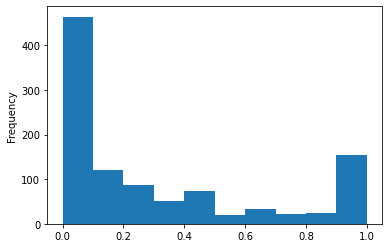

In [177]:
percent_pinless.plot.hist()

In [337]:
# Data Store audiences, 'other' AKs
sql = """
SELECT
  audience_key_labels.id AS ak_id,
  liveramp_customer_accounts.id,
  audience_key_labels.key_index,
  audience_key_labels.label,
  liveramp_customer_accounts.customer_id,
  customers.name,
  liveramp_customer_accounts.display_name,
  STRING_AGG(LOWER(audience_key_labels.label)) AS aks,
  COUNT(audience_key_labels.id) AS count_AKs
FROM
  `corp-bi-us-prod.rldb.audience_key_labels` AS audience_key_labels
INNER JOIN
  `corp-bi-us-prod.rldb.liveramp_customer_accounts` AS liveramp_customer_accounts
ON
  audience_key_labels.liveramp_customer_account_id = liveramp_customer_accounts.id
INNER JOIN
  `corp-bi-us-prod.rldb.customers` AS customers
ON
  liveramp_customer_accounts.customer_id = customers.id
WHERE
  liveramp_customer_accounts.id IN (
              SELECT
                lr_customer_accounts.id
              FROM
                `corp-bi-us-prod.rldb.dms_segments` AS dms_segments
              INNER JOIN
                `corp-bi-us-prod.rldb.lrc_field_definitions` AS lrc_field_definitions
              ON
                dms_segments.lrc_field_definition_id = lrc_field_definitions.id
              INNER JOIN
                `corp-bi-us-prod.rldb.liveramp_customer_accounts` AS lr_customer_accounts
              ON
                lrc_field_definitions.lr_customer_account_id = lr_customer_accounts.id
              INNER JOIN
                `corp-bi-us-prod.rldb.customers` AS customers
              ON
                lr_customer_accounts.customer_id = customers.id
              WHERE
                lr_customer_accounts.enabled = TRUE
                AND lr_customer_accounts.customer_link_audience = FALSE
                AND customers.status = 1
              GROUP BY
                lr_customer_accounts.id)
  AND customers.status = 1
  AND liveramp_customer_accounts.enabled = TRUE
  AND liveramp_customer_accounts.customer_link_audience = FALSE
  AND audience_key_labels.key_index = 0
GROUP BY
  liveramp_customer_accounts.id,
  liveramp_customer_accounts.display_name,
  liveramp_customer_accounts.customer_id,
  customers.name,
  audience_key_labels.key_index,
  ak_id,
  audience_key_labels.label
"""
x = datetime.datetime.now()
print("Last data pull:", x)

DS_aks = pandas_gbq.read_gbq(sql, project_id='liveramp-ts-bigquery')


Last data pull: 2020-07-08 21:10:20.502731


Downloading: 100%|██████████| 1616/1616 [00:00<00:00, 3844.24rows/s]


In [338]:
ds_aks = pd.DataFrame(DS_aks["aks"].value_counts())
ds_aks

,aks
pel,265
device id,253
idl,101
id,73
clink_16,62
email,55
device_id,55
firstname,39
agile_id,30
rnc_reg_id,24


In [339]:
pel = ds_aks.loc["pel"]
pel = pel["aks"]

device_id = (ds_aks.loc["device id"] + ds_aks.loc["device_id"])
device_id = device_id["aks"]

idl = ds_aks.loc["idl"]
idl = idl["aks"]

clink = ds_aks.loc["clink_16"]
clink = clink["aks"]

generic_id = ds_aks.loc["id"]
generic_id = generic_id["aks"]

first_name = ds_aks.loc["firstname"] + ds_aks.loc["first_name"]
first_name = first_name["aks"]

agile_id = ds_aks.loc["agile_id"]
agile_id = agile_id["aks"]

rnc_reg_id = ds_aks.loc["rnc_reg_id"]
rnc_reg_id = rnc_reg_id["aks"]

last_name = ds_aks.loc["lastname"]
last_name = last_name["aks"]

fb_ext_id = ds_aks.loc["fb_ext_id"]
fb_ext_id = fb_ext_id["aks"]

aiq_hhid = ds_aks.loc["aiq_hhid"]
aiq_hhid = aiq_hhid["aks"]

ds_other_aks = {'AK Type': ["pel", 
                            "device_id", 
                            "idl", 
                            "clink", 
                            "generic_id", 
                            "first_name", 
                            "agile_id", 
                            "rnc_reg_id",
                            "last_name",
                            "fb_ext_id",
                            "aiq_hhid"],
               'Number of Audiences': [pel, 
                                       device_id, 
                                       idl, clink, 
                                       generic_id, 
                                       first_name, 
                                       agile_id, 
                                       rnc_reg_id,
                                       last_name,
                                       fb_ext_id,
                                       aiq_hhid]
               }
ds_other_aks_table = pd.DataFrame(ds_other_aks, columns = ['AK Type', 'Number of Audiences'])
ds_other_aks_table


,AK Type,Number of Audiences
0,pel,265
1,device_id,308
2,idl,101
3,clink,62
4,generic_id,73
5,first_name,57
6,agile_id,30
7,rnc_reg_id,24
8,last_name,16
9,fb_ext_id,16
